# Lambda Virus Genome Study

In [18]:
# Lambda Virus genome
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2025-03-26 19:47:03--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.175, 18.155.188.60, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.02s   

2025-03-26 19:47:04 (2.31 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [19]:
def readGenome(filename):
    with open(filename, 'r') as f:
        return ''.join(line.strip() for line in f if not line.startswith('>'))



lambda_virus_genome = readGenome('lambda_virus.fa')

In [20]:
# Size of Lambda Virus Genome
len(lambda_virus_genome)

48502

In [24]:
def reverseComplement(s):
    table = str.maketrans('ACGTN', 'TGCAN')
    return s[::-1].translate(table)

In [35]:
def naive_with_rc(p, t):
    """
     Searches for occurrences of pattern p or its reverse complement in text T.
     Returns a sorted list of starting indices where either occurs.
     If p equals its reverse complement, a match is reported only once.
    """
    m = len(p)
    n = len(t)
    # Find all occurrences of p in t using slicing
    appearance = [i for i in range(n - m + 1) if t[i:i+m] == p]
    
    # Compute the reverse complement once
    cp = reverseComplement(p)
    # Find all occurrences of the reverse complement in t
    cappearance = [i for i in range(n - m + 1) if t[i:i+m] == cp]
    
    return appearance, cappearance 

## How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22. 

In [36]:
appearances = naive_with_rc('AGGT', lambda_virus_genome)
len(appearances[0])+len(appearances[1])

306

## How many times does TTAA or its reverse complement occur in the lambda virus genome? Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [38]:
appearances = naive_with_rc('TTAA', lambda_virus_genome)
len(appearances[1])

195

## What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [39]:
appearances = naive_with_rc('ACTAAGT', lambda_virus_genome)
appearances[0][0], appearances[1][0]

(27733, 26028)

## What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [40]:
appearances = naive_with_rc('AGTCGA', lambda_virus_genome)
appearances[0][0], appearances[1][0]

(18005, 450)

## How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [42]:
def naive_2mm_method1(p, t):
    m = len(p)
    n = len(t)
    appearance = []
    
    for i in range(n - m + 1):
        mismatches = 0
        # Use slicing and zip to compare corresponding characters
        for a, b in zip(t[i:i+m], p):
            if a != b:
                mismatches += 1
                if mismatches > 2:
                    break
        if mismatches <= 2:
            appearance.append(i)
    
    return appearance

In [43]:
def naive_2mm_method2(p, t):
    appearance = []    
    
    for i in range(len(t) - len(p) + 1):
        mismatch = 0
        for j in range(len(p)):            
            if t[i + j] != p[j]:
                mismatch += 1
                if mismatch == 3:
                    break                
        if mismatch <= 2:
            appearance.append(i)
            
    return appearance

In [44]:
appearances1 = naive_2mm_method1('TTCAAGCC', lambda_virus_genome)
appearances1[0]
len(appearances1)

191

In [45]:
appearances2 = naive_2mm_method2('TTCAAGCC', lambda_virus_genome)
appearances2[0]
len(appearances2)

191

In [46]:
lambda_virus_genome[45:(45+8)]

'TTTAAGGC'

## What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [48]:
appearances = naive_2mm_method1('AGGAGGTT', lambda_virus_genome)
appearances[0]

49

## Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq. Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

## Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. This dataset has something wrong with it; one of the sequencing cycles is poor quality. Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle.

In [49]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2025-03-26 20:04:01--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.60, 18.155.188.170, 18.155.188.175, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  1.39MB/s    in 0.2s    

2025-03-26 20:04:01 (1.39 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [50]:
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [51]:
human_reads = readFastq('ERR037900_1.first1000.fastq')

In [52]:
import collections
human_reads = readFastq('ERR037900_1.first1000.fastq')
count = collections.Counter()
for read in human_reads:
    count.update(read)
count

Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})

## GC content as a function of position for Human genome

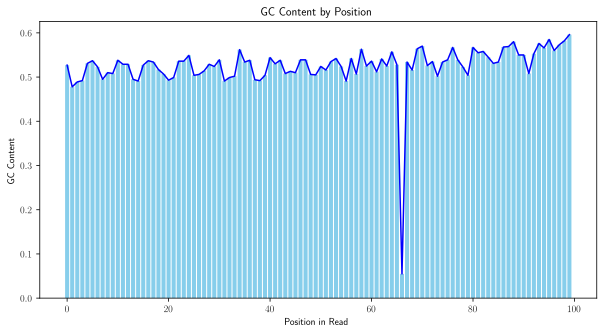

In [57]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)

def gc_by_position(reads):
    # Assuming all reads are of equal length.
    L = len(reads[0])
    gc_counts = [0] * L
    total_counts = [0] * L

    for read in reads:
        for i, base in enumerate(read):
            total_counts[i] += 1
            if base in 'GC':
                gc_counts[i] += 1

    # Compute GC ratio per position
    return [gc_counts[i] / total_counts[i] for i in range(L)]

# Compute GC content by position from the human_reads
gc_ratio = gc_by_position(human_reads)

# Plotting the GC content as a function of position
plt.figure(figsize=(10, 5))
plt.plot(range(len(gc_ratio)), gc_ratio, linestyle='-', color='blue')
plt.bar(range(len(gc_ratio)), gc_ratio, color='skyblue')
plt.xlabel("Position in Read")
plt.ylabel("GC Content")
plt.title("GC Content by Position")
plt.grid(False)
plt.show()


In [59]:
for i in range(len(gc_ratio)):
    if gc_ratio[i] < 0.1:
        print(i)

66


In [58]:
fraction_GC = (count['G'] + count['C'])/(count['G'] + count['C']+count['T'] + count['A'])
print("Fractional GC content = ", fraction_GC)

Fractional GC content =  0.530377651736875
